# Test Notebook to visualize the data and start playing around

## Libraries

In [1]:
import pandas as pd
import numpy as np
import math
%matplotlib inline
from matplotlib import pyplot as plt
import random
random.seed(1)

## Import of Picture data

In [2]:
df = pd.read_csv(r'data\hmnist_28_28_L.csv')
print(df)

       pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0            169        171        170        177        181        182   
1             19         57        105        140        149        148   
2            155        163        161        167        167        172   
3             25         71        116        139        136        153   
4            129        162        181        196        205        208   
...          ...        ...        ...        ...        ...        ...   
10010        172        171        173        175        164        187   
10011          2         34        108        116        114        119   
10012        122        154        162        170        179        197   
10013        137        143        141        139        147        152   
10014        149        157        157        152        151        152   

       pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel0775  pixel0776  \
0            181   

## Display of images

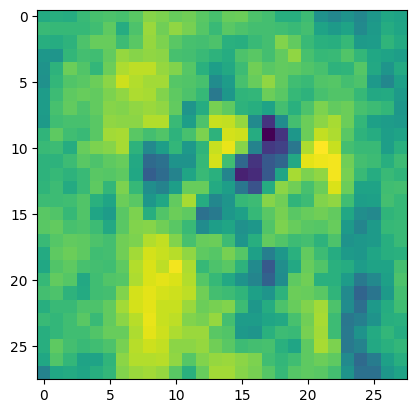

In [3]:
def disp_img(data_vec):
    if math.sqrt(np.size(data_vec)) != int(math.sqrt(np.size(data_vec))):
        img_label = data_vec[-1]
        img_vec = data_vec[0:-1]
    else:
        img_vec = data_vec

    size = np.size(img_vec)
    dimension = int(math.sqrt(size))

    img_mat = np.reshape(np.array(img_vec), (dimension, dimension))

    plt.imshow(img_mat)
    plt.show()

img_number = 0
data_vec = df.loc[img_number]

disp_img(data_vec)

# Extraction and grouping of labels 

In [4]:
label = df['label']
uniq_label, counts_label = np.unique(label, return_counts=True)
print(list(zip(uniq_label, counts_label)))

[(0, 327), (1, 514), (2, 1099), (3, 115), (4, 6705), (5, 142), (6, 1113)]


# Import of Metadata

In [5]:
df_meta = pd.read_csv(r'data\HAM10000_metadata.csv')
print(df_meta)

         lesion_id      image_id     dx dx_type   age     sex localization
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear
...            ...           ...    ...     ...   ...     ...          ...
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back

[10015 rows x 7 columns]


# Extraction of different diagnostic cathegories

Labels / Cathegories:

0 / Actinic keratoses and intraepithelial carcinoma / Bowen's disease (akiec)

1 / basal cell carcinoma (bcc)

2 / benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses, bkl)

3 / dermatofibroma (df)

4 / melanoma (mel)

5 / melanocytic nevi (nv)

6 / vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage, vasc)

In [6]:
cath = df_meta['dx']
uniq_cath, counts_cath = np.unique(cath, return_counts=True)
print(list(zip(uniq_cath, counts_cath)))

[('akiec', 327), ('bcc', 514), ('bkl', 1099), ('df', 115), ('mel', 1113), ('nv', 6705), ('vasc', 142)]


# Grouping the pictures by the different diagnosis

In [7]:
img_index_group = []                #List with 6 nested lists; index of nested list = label / cathegorie; values in nested lists = index of pictures belonging to that label /cathegorie
for i in range(len(uniq_label)):
    img_index_group.append([])
    for j in range(df.shape[0]):
        if df['label'][j] == i:
            img_index_group[i].append(j)

print(list((i, len(img_index_group[i])) for i in range(len(img_index_group))))
print(img_index_group)

[(0, 327), (1, 514), (2, 1099), (3, 115), (4, 6705), (5, 142), (6, 1113)]
[[9687, 9688, 9689, 9690, 9691, 9692, 9693, 9694, 9695, 9696, 9697, 9698, 9699, 9700, 9701, 9702, 9703, 9704, 9705, 9706, 9707, 9708, 9709, 9710, 9711, 9712, 9713, 9714, 9715, 9716, 9717, 9718, 9719, 9720, 9721, 9722, 9723, 9724, 9725, 9726, 9727, 9728, 9729, 9730, 9731, 9732, 9733, 9734, 9735, 9736, 9737, 9738, 9739, 9740, 9741, 9742, 9743, 9744, 9745, 9746, 9747, 9748, 9749, 9750, 9751, 9752, 9753, 9754, 9755, 9756, 9757, 9758, 9759, 9760, 9761, 9762, 9763, 9764, 9765, 9766, 9767, 9768, 9769, 9770, 9771, 9772, 9773, 9774, 9775, 9776, 9777, 9778, 9779, 9780, 9781, 9782, 9783, 9784, 9785, 9786, 9787, 9788, 9789, 9790, 9791, 9792, 9793, 9794, 9795, 9796, 9797, 9798, 9799, 9800, 9801, 9802, 9803, 9804, 9805, 9806, 9807, 9808, 9809, 9810, 9811, 9812, 9813, 9814, 9815, 9816, 9817, 9818, 9819, 9820, 9821, 9822, 9823, 9824, 9825, 9826, 9827, 9828, 9829, 9830, 9831, 9832, 9833, 9834, 9835, 9836, 9837, 9838, 9839, 9840, 

# Splitting into training and testing data

In [8]:
training_split = 0.9                #Percentage of Data used for training
img_index_group_split = []          #Same as img_index_group but every nested list is split into two lists: first is list for training, second is list for testing

for i in range(len(img_index_group)):
    random.shuffle(img_index_group[i])
    split_point = round(len(img_index_group[i])*training_split)
    img_index_group_split.append([img_index_group[i][:split_point], img_index_group[i][split_point:]])
    
    #print(i)
    #print(len(img_index_group_split[i][0]))
    #print(len(img_index_group_split[i][1]))

print(img_index_group_split)

[[[9869, 9930, 9791, 9717, 9866, 9879, 9891, 9743, 9763, 9931, 9951, 9813, 9916, 9953, 9865, 9829, 9950, 9798, 9864, 10007, 10002, 9768, 9898, 9706, 9779, 9845, 9905, 9847, 9868, 9912, 9901, 10009, 9980, 9821, 9935, 9764, 9990, 9965, 9718, 9721, 9709, 9722, 9757, 9960, 9841, 9850, 10006, 9837, 9981, 9861, 9906, 9723, 9895, 9749, 9795, 9697, 9892, 9860, 9856, 9973, 9772, 9889, 9985, 9689, 9809, 10012, 9947, 9736, 9988, 9853, 9711, 9944, 9713, 9699, 9961, 9712, 9975, 9972, 9875, 9858, 9870, 9776, 9831, 9839, 9896, 9854, 9933, 9786, 10011, 9759, 9995, 9707, 9929, 9783, 9967, 9885, 9726, 9833, 9826, 9703, 9725, 9941, 9871, 9890, 9976, 9939, 9925, 9974, 9760, 9883, 9737, 9999, 9963, 9754, 9937, 9820, 9934, 9848, 9789, 9767, 9851, 10005, 9872, 9741, 9773, 9877, 9956, 9801, 9728, 9696, 9724, 9788, 9987, 9744, 9692, 9984, 9740, 10010, 9751, 9714, 9753, 10003, 10004, 9774, 9913, 9766, 9693, 9716, 9808, 9814, 9769, 9803, 9762, 9756, 9926, 9822, 9862, 9727, 9729, 9954, 9761, 9880, 9734, 9969, 971

# Running Clustering on the different diagnosis

## Principal Component Analysis

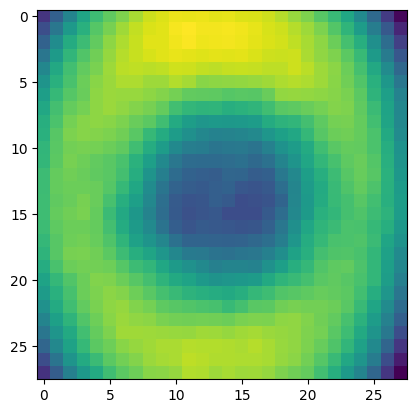

pixel0000    141.951070
pixel0001    148.571865
pixel0002    154.773700
pixel0003    160.703364
pixel0004    165.149847
                ...    
pixel0780    154.813456
pixel0781    149.571865
pixel0782    142.165138
pixel0783    135.253823
label          0.000000
Length: 785, dtype: float64


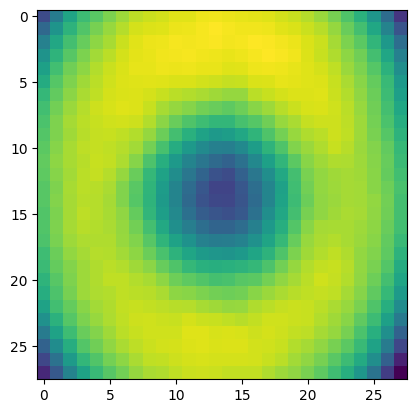

pixel0000    142.474708
pixel0001    151.447471
pixel0002    159.025292
pixel0003    163.750973
pixel0004    166.478599
                ...    
pixel0780    156.429961
pixel0781    149.571984
pixel0782    140.449416
pixel0783    131.920233
label          1.000000
Length: 785, dtype: float64


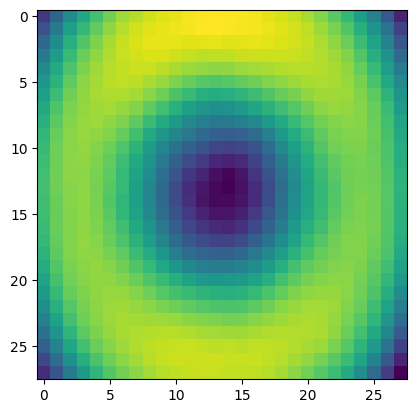

pixel0000    127.044586
pixel0001    134.572338
pixel0002    141.916288
pixel0003    147.786169
pixel0004    152.607825
                ...    
pixel0780    142.708826
pixel0781    135.993631
pixel0782    127.997270
pixel0783    119.348499
label          2.000000
Length: 785, dtype: float64


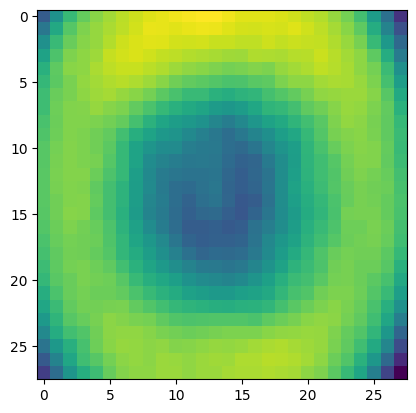

pixel0000    145.078261
pixel0001    156.330435
pixel0002    164.808696
pixel0003    169.530435
pixel0004    172.417391
                ...    
pixel0780    160.269565
pixel0781    152.269565
pixel0782    140.504348
pixel0783    129.947826
label          3.000000
Length: 785, dtype: float64


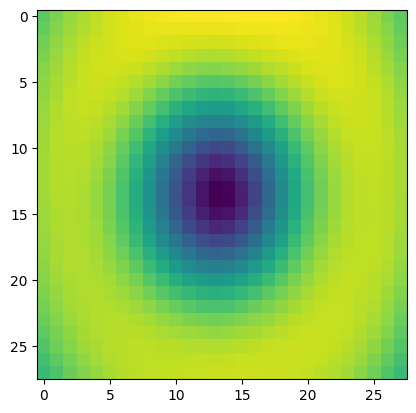

pixel0000    154.427890
pixel0001    158.798359
pixel0002    162.214914
pixel0003    164.558688
pixel0004    166.907233
                ...    
pixel0780    160.433855
pixel0781    156.984191
pixel0782    153.074720
pixel0783    149.043997
label          4.000000
Length: 785, dtype: float64


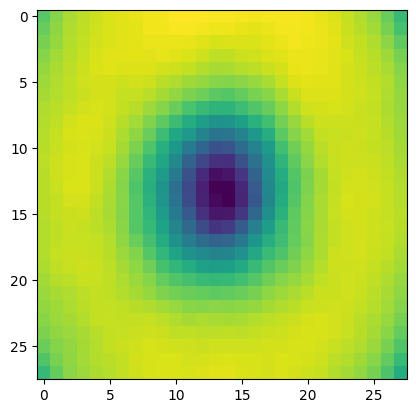

pixel0000    158.359155
pixel0001    164.753521
pixel0002    169.380282
pixel0003    171.640845
pixel0004    173.746479
                ...    
pixel0780    166.647887
pixel0781    162.830986
pixel0782    156.922535
pixel0783    148.007042
label          5.000000
Length: 785, dtype: float64


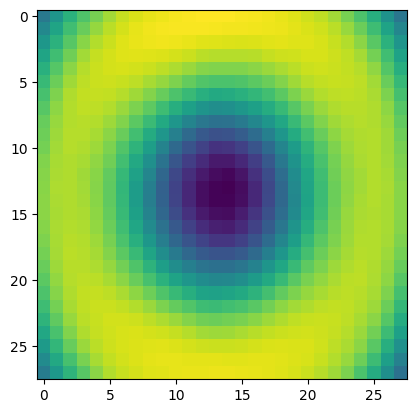

pixel0000    124.917341
pixel0001    134.283917
pixel0002    143.216532
pixel0003    149.942498
pixel0004    155.674753
                ...    
pixel0780    149.589398
pixel0781    141.782570
pixel0782    132.428571
pixel0783    122.437556
label          6.000000
Length: 785, dtype: float64


In [51]:
mean = []

for i in range(len(img_index_group)):
    mean.append(np.mean(df.loc[img_index_group[i]], axis=0))
    
    disp_img(mean[i])
    print(mean[i])
